<a href="https://colab.research.google.com/github/w2k31984/Practicas_scikit-learn_ML_Python/blob/master/Sk_Regresion_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.7.12


In [3]:
import sklearn

In [4]:
sklearn.__version__

'1.0.2'

Regresion Lineal Simple, aca nuestro modelo unicamente debe aprender dos constantes 0 = Interseccion y 1 = la pendiente.

1)Entrenando nuestro modelo

$y= b_0 + b_1x$

2)Importando nuestro archivo que esta guardado en google drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3) Importando librerias al proyecto: numpy, pandas, matplotlib.



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


4)Cargamos nuestro set de datos desde Drive que estan en excel.

In [36]:
data = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/DataSets/ReduccionSolidosDemandaOxigeno.xlsx")

5)Consultando el contenido de la variable data.

In [37]:
data #Visualizando los datos completos de la variable data.

,Reduccion de solidos,Reduccion de la demanda de oxigeno
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16
5,27,28
6,29,27
7,30,25
8,30,35
9,31,30


6)Se guardara en una variable X la variable data Reduccion de solidos

In [40]:
x = data[["Reduccion de solidos"]]
x #Visualizando los datos de X

,Reduccion de solidos
0,3
1,7
2,11
3,15
4,18
5,27
6,29
7,30
8,30
9,31


7)Se guardara en una variable Y la variable data Reduccion de la demanda de oxigeno

In [41]:
y = data[["Reduccion de la demanda de oxigeno"]]
y #Visualizando los datos de Y

,Reduccion de la demanda de oxigeno
0,5
1,11
2,21
3,16
4,16
5,28
6,27
7,25
8,35
9,30


8)Creando el grafico de dispersion de las variables de nuestro dataset.

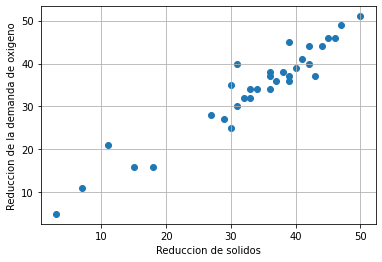

In [42]:
plt.scatter(x,y)#Creando el grafico con las variables de datos X,Y
plt.xlabel("Reduccion de solidos") #Nombre de variable X
plt.ylabel("Reduccion de la demanda de oxigeno") #Nombre de la variable Y
plt.grid()#Creando el tipo de cuadricula
plt.show()#Presentando el grafico

9)Convirtiendo el dataframe que tenemos a numpy con una matriz de datos

In [44]:
matriz = data.to_numpy()#Creando la matriz de datos con numpy
matriz #Consultando nuestra matriz de datos.

array([[ 3,  5],
       [ 7, 11],
       [11, 21],
       [15, 16],
       [18, 16],
       [27, 28],
       [29, 27],
       [30, 25],
       [30, 35],
       [31, 30],
       [31, 40],
       [32, 32],
       [33, 34],
       [33, 32],
       [34, 34],
       [36, 37],
       [36, 38],
       [36, 34],
       [37, 36],
       [38, 38],
       [39, 37],
       [39, 36],
       [39, 45],
       [40, 39],
       [41, 41],
       [42, 40],
       [42, 44],
       [43, 37],
       [44, 44],
       [45, 46],
       [46, 46],
       [47, 49],
       [50, 51]])

10)Calculando el valor de n con la matriz de datos.

In [46]:
n = len(matriz) #Onteniendo el valor de n que es la cantidad de datos en la matriz 
sumatoria_x = np.sum(matriz[:,0])
sumatoria_y = np.sum(matriz[:,1])
sumatoria_producto = np.sum(matriz[:,0]*matriz[:,1])
sumatoria_cuadrado_x = np.sum(matriz[:,0]*matriz[:,0])

print("n:", n)
print("sumatoria x:", sumatoria_x)
print("sumatoria y:", sumatoria_y)
print("sumatoria xy:", sumatoria_producto)
print("sumatoria x^2:", sumatoria_cuadrado_x)


n: 33
sumatoria x: 1104
sumatoria y: 1124
sumatoria xy: 41355
sumatoria x^2: 41086


11)Realizando la sustitucion de valores obtenidos de la matriz en la ECU.

In [47]:
b1 = (n*sumatoria_producto-sumatoria_x*sumatoria_y) / (n*sumatoria_cuadrado_x-sumatoria_x*sumatoria_x)
b0 = (sumatoria_y-b1*sumatoria_x)/n

print("b1:", b1)
print("b0:", b0)

b1: 0.9036432105793231
b0: 3.829633197588709


12)Creando el modelo en scikit-learn

In [48]:
clf = LinearRegression() #Creando nuestro modelo de regresion con Scikit-learn.

13) Entrenando el modelo creado.

In [49]:
clf.fit(x,y) # Entrenando nuestro modelo con los datos de X y Y

LinearRegression()

14)Creando el entrenamiento de nuestro modelo.

In [50]:
clf.coef_ #Esto nos da el valor de b1

array([[0.90364321]])

15)Obteniendo el valor de la intercept o b0

In [51]:
clf.intercept_ #Esto nos obtiene el valor de b0 que es el intercepto

array([3.8296332])

16)Encontrando la prediccion en un valor del dataset

In [53]:
clf.predict([[7]]) #Hacemos la prediccion con un valor obtenido del dataset en este caso el 7 para ver valores cercanos.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[10.15513567]])

In [54]:
clf.predict([[100]]) #Hacemos la prediccion con un valor obtenido del dataset en este caso el 100 para ver valores cercanos.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[94.19395426]])

17)Graficando los valores, para que pueda observarse la regresion lineal.

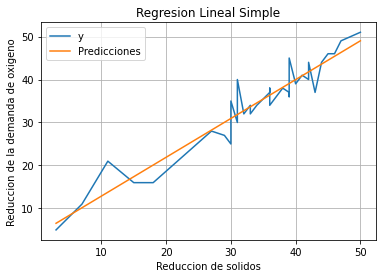

In [56]:
plt.plot(x,y) #Graficando los valores de x,y
plt.plot(x, clf.predict(x))#Se va a tratar de predecir toda la matriz de x
plt.title("Regresion Lineal Simple")
plt.xlabel("Reduccion de solidos") #Nombre de variable X
plt.ylabel("Reduccion de la demanda de oxigeno") #Nombre de la variable Y
plt.legend(["y", "Predicciones"]) #Y son los valores deseados y las predicciones
plt.grid()#Creando el tipo de cuadricula
plt.show()#Presentando el grafico


18) Interpretacion de los datos: $y = 3.83 + 0.9x$